<a href="https://colab.research.google.com/github/MayankJadhav784/TASK-11/blob/main/Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB.csv


In [2]:
import pandas as pd
df = pd.read_csv("marketing_AB.csv")
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [6]:
df.columns


Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [7]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [8]:
df['converted'] = df['converted'].astype(int)
df['test group'].value_counts()

,count
test group,
ad,564577
psa,23524


In [9]:
control = df[df['test group'] == 'psa']['converted']
test = df[df['test group'] == 'ad']['converted']

print("Control Conversion Rate:", control.mean())
print("Test Conversion Rate:", test.mean())

Control Conversion Rate: 0.01785410644448223
Test Conversion Rate: 0.025546559636683747


In [10]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(control, test)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -7.37040597428566 p-value: 1.7033052627831264e-13


In [11]:
alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant difference between groups")
else:
    print("Fail to reject H0 → No significant difference")

Reject H0 → Significant difference between groups


In [12]:
import numpy as np

diff = test.mean() - control.mean()
se = np.sqrt(control.var()/len(control) + test.var()/len(test))
ci_low, ci_high = diff - 1.96*se, diff + 1.96*se
print("95% CI for difference:", (ci_low, ci_high))

95% CI for difference: (np.float64(0.005950865393694588), np.float64(0.009434040990708447))


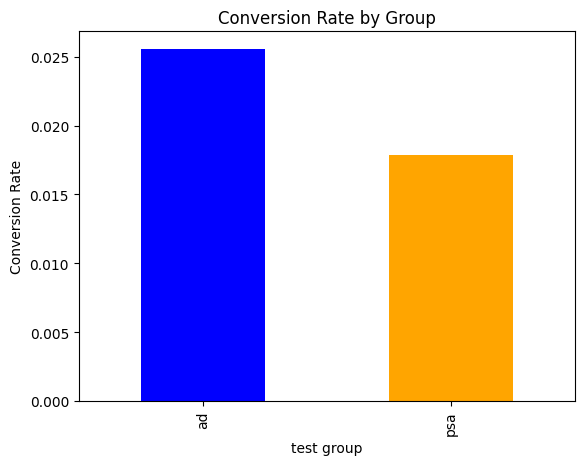

In [13]:
import matplotlib.pyplot as plt

df.groupby('test group')['converted'].mean().plot(kind='bar', color=['blue','orange'])
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

In [14]:
summary = pd.DataFrame({
    "Group": ["Control", "Test"],
    "Conversion Rate": [control.mean(), test.mean()]
})
summary.to_csv("ab_test_summary.csv", index=False)

In [15]:
with open("final_recommendation.txt", "w") as f:
    if p_val < alpha:
        f.write("Recommendation: Implement Test group changes. Significant improvement observed.")
    else:
        f.write("Recommendation: Stick with Control. No significant improvement.")

In [16]:
import os
os.listdir()

['.config',
 'ab_test_summary.csv',
 'final_recommendation.txt',
 'marketing_AB.csv',
 'sample_data']

In [17]:
from google.colab import files
files.download("ab_test_summary.csv")
files.download("final_recommendation.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from google.colab import files
files.download("final_recommendation.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>